In [1]:
# 내장 라이브러리
import glob
import pathlib

# 외부 라이브러리
import pandas as pd
import pandas.io.formats.format as pf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


pd.options.display.float_format = '{:0,.2f}'.format

plt.rcParams['font.family'] ='D2Coding'
plt.rcParams['axes.unicode_minus'] =False

DAY_OF_WEEK = ['월', '화', '수', '목', '금', '토', '일']
DAY_OF_WEEK_MAPPER = {i: day for i, day in enumerate(DAY_OF_WEEK)}
BASE_DIR = pathlib.Path('../').resolve()


# 데이터를 병합하여 하나의 데이터프레임 형성

files = glob.glob(str(BASE_DIR / '실습' / 'rawfiles' / 'CARD_SUBWAY_MONTH_*.csv'))

print('Files:\n'+'\n'.join(files)+'\n')

df_subway_raw = pd.concat([pd.read_csv(filename) for filename in files])
df_subway_raw.info()

Files:
/Users/hepheir/GitHub/smu-202115064/Training-project-for-AI-X-Pioneers-Basic/실습/rawfiles/CARD_SUBWAY_MONTH_201903.csv
/Users/hepheir/GitHub/smu-202115064/Training-project-for-AI-X-Pioneers-Basic/실습/rawfiles/CARD_SUBWAY_MONTH_201902.csv
/Users/hepheir/GitHub/smu-202115064/Training-project-for-AI-X-Pioneers-Basic/실습/rawfiles/CARD_SUBWAY_MONTH_201901.csv
/Users/hepheir/GitHub/smu-202115064/Training-project-for-AI-X-Pioneers-Basic/실습/rawfiles/CARD_SUBWAY_MONTH_201905.csv
/Users/hepheir/GitHub/smu-202115064/Training-project-for-AI-X-Pioneers-Basic/실습/rawfiles/CARD_SUBWAY_MONTH_201904.csv
/Users/hepheir/GitHub/smu-202115064/Training-project-for-AI-X-Pioneers-Basic/실습/rawfiles/CARD_SUBWAY_MONTH_201906.csv

<class 'pandas.core.frame.DataFrame'>
Index: 107028 entries, 0 to 17723
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   사용일자    107028 non-null  int64  
 1   노선명     107028 non-null  object 
 2   역명      107028 non-null

In [2]:
df = df_subway_raw.copy()

df['사용일자'] = pd.to_datetime(df['사용일자'], format='%Y%m%d')
df['요일'] = df['사용일자'].dt.dayofweek.map(DAY_OF_WEEK_MAPPER)
df['요일'] = pd.Categorical(df['요일'], categories=DAY_OF_WEEK, ordered=True)
df['승하차총승객수'] = df['승차총승객수'] + df['하차총승객수']

df_subway = df.copy()

np.random.seed(0)
df.sample(20)

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,요일,승하차총승객수
6234,2019-06-11,경춘선,퇴계원,"4,404.00","4,075.00",20190614,화,"8,479.00"
16251,2019-06-28,1호선,온양온천,"4,757.00","4,889.00",20190701,금,"9,646.00"
10344,2019-02-18,4호선,상록수,"20,839.00","20,546.00",20190221,월,"41,385.00"
3310,2019-02-06,경춘선,가평,"1,881.00","1,662.00",20190209,수,"3,543.00"
13946,2019-03-24,경춘선,대성리,"5,666.00",652.00,20190327,일,"6,318.00"
11715,2019-03-20,2호선,사당,"33,209.00","28,596.00",20190323,수,"61,805.00"
634,2019-05-02,2호선,신대방,"33,293.00","31,885.00",20190505,목,"65,178.00"
6530,2019-01-12,2호선,잠실새내,"22,579.00","24,271.00",20190115,토,"46,850.00"
2606,2019-02-05,분당선,서현,"6,991.00","7,644.00",20190208,화,"14,635.00"
2513,2019-03-05,경의선,효창공원앞,"8,689.00","8,629.00",20190308,화,"17,318.00"


In [3]:
def get_df() -> pd.DataFrame:
    df = df_subway.copy()
    df['평균 승하차총승객수'] = df['승하차총승객수']
    df['합계 승하차총승객수'] = df['승하차총승객수']
    return df \
        .groupby(['요일']) \
        .aggregate({
            '합계 승하차총승객수': np.sum,
            '평균 승하차총승객수': np.mean,
        }) \
        .reset_index()


get_df()

/var/folders/ld/qthvz3k91_1239xs6fkx1zx00000gn/T/ipykernel_87484/49372559.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['요일']) \
/var/folders/ld/qthvz3k91_1239xs6fkx1zx00000gn/T/ipykernel_87484/49372559.py:7: FutureWarning: The provided callable <function sum at 0x10a74af20> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  .aggregate({
/var/folders/ld/qthvz3k91_1239xs6fkx1zx00000gn/T/ipykernel_87484/49372559.py:7: FutureWarning: The provided callable <function mean at 0x10a754360> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  .aggregat

,요일,합계 승하차총승객수,평균 승하차총승객수
0,월,"391,555,551.00","26,474.34"
1,화,"411,979,965.00","26,784.99"
2,수,"421,134,136.00","27,397.97"
3,목,"428,684,383.00","27,869.22"
4,금,"445,310,717.00","28,959.53"
5,토,"341,950,018.00","22,249.33"
6,일,"247,523,995.00","16,116.94"


/var/folders/ld/qthvz3k91_1239xs6fkx1zx00000gn/T/ipykernel_87484/49372559.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['요일']) \
/var/folders/ld/qthvz3k91_1239xs6fkx1zx00000gn/T/ipykernel_87484/49372559.py:7: FutureWarning: The provided callable <function sum at 0x10a74af20> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  .aggregate({
/var/folders/ld/qthvz3k91_1239xs6fkx1zx00000gn/T/ipykernel_87484/49372559.py:7: FutureWarning: The provided callable <function mean at 0x10a754360> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  .aggregat

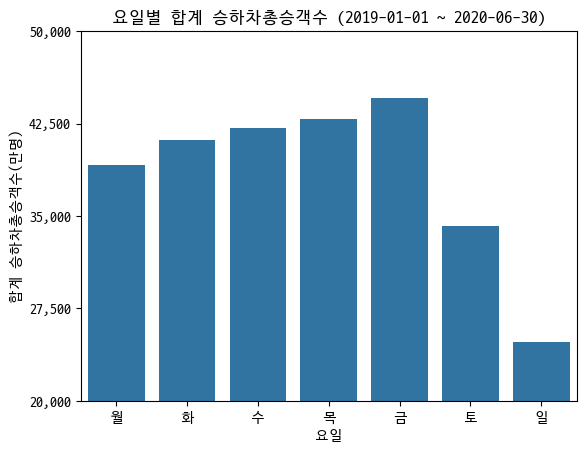

In [4]:
def display_sum(ax: plt.Axes, **kwargs):
    sns.barplot(data=get_df(), ax=ax, x='요일', y='합계 승하차총승객수', **kwargs)

    ylim = 2e8, 5e8
    yticks = np.linspace(*ylim, 5)

    ax.set_ylabel('합계 승하차총승객수(만명)')
    ax.set_ylim(*ylim)
    ax.set_yticks(ticks=yticks, labels=[f'{int(y/10000):,}' for y in yticks])


display_sum(ax=plt.gca())
plt.title('요일별 합계 승하차총승객수 (2019-01-01 ~ 2020-06-30)')
plt.show()

/var/folders/ld/qthvz3k91_1239xs6fkx1zx00000gn/T/ipykernel_87484/49372559.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['요일']) \
/var/folders/ld/qthvz3k91_1239xs6fkx1zx00000gn/T/ipykernel_87484/49372559.py:7: FutureWarning: The provided callable <function sum at 0x10a74af20> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  .aggregate({
/var/folders/ld/qthvz3k91_1239xs6fkx1zx00000gn/T/ipykernel_87484/49372559.py:7: FutureWarning: The provided callable <function mean at 0x10a754360> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  .aggregat

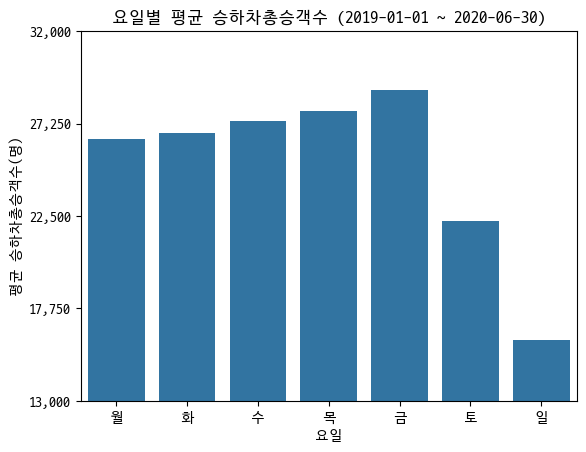

In [5]:
def display_mean(ax: plt.Axes, **kwargs):
    sns.barplot(data=get_df(), ax=ax, x='요일', y='평균 승하차총승객수', **kwargs)

    ylim = 1.3e4, 3.2e4
    yticks = np.linspace(*ylim, 5)

    ax.set_ylabel('평균 승하차총승객수(명)')
    ax.set_ylim(*ylim)
    ax.set_yticks(ticks=yticks, labels=[f'{int(y):,}' for y in yticks])


display_mean(ax=plt.gca())
plt.title('요일별 평균 승하차총승객수 (2019-01-01 ~ 2020-06-30)')
plt.show()

/var/folders/ld/qthvz3k91_1239xs6fkx1zx00000gn/T/ipykernel_87484/49372559.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['요일']) \
/var/folders/ld/qthvz3k91_1239xs6fkx1zx00000gn/T/ipykernel_87484/49372559.py:7: FutureWarning: The provided callable <function sum at 0x10a74af20> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  .aggregate({
/var/folders/ld/qthvz3k91_1239xs6fkx1zx00000gn/T/ipykernel_87484/49372559.py:7: FutureWarning: The provided callable <function mean at 0x10a754360> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  .aggregat

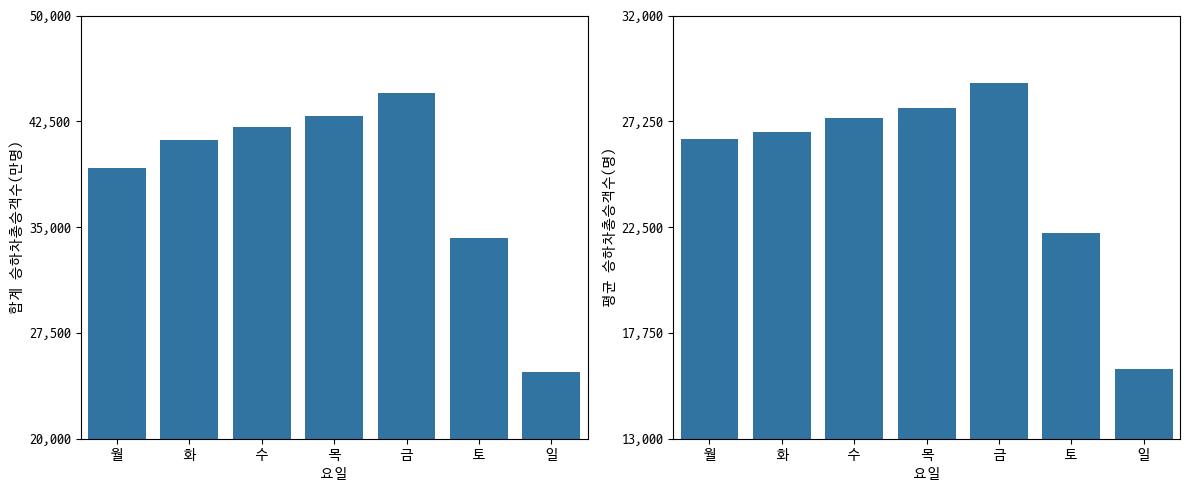

In [6]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
display_sum(ax=plt.gca())

plt.subplot(1, 2, 2)
display_mean(ax=plt.gca())

plt.tight_layout()

/var/folders/ld/qthvz3k91_1239xs6fkx1zx00000gn/T/ipykernel_87484/49372559.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['요일']) \
/var/folders/ld/qthvz3k91_1239xs6fkx1zx00000gn/T/ipykernel_87484/49372559.py:7: FutureWarning: The provided callable <function sum at 0x10a74af20> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  .aggregate({
/var/folders/ld/qthvz3k91_1239xs6fkx1zx00000gn/T/ipykernel_87484/49372559.py:7: FutureWarning: The provided callable <function mean at 0x10a754360> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  .aggregat

Text(0.5, 1.0, '요일별 승하차총승객수 (2019-01-01 ~ 2020-06-30)')

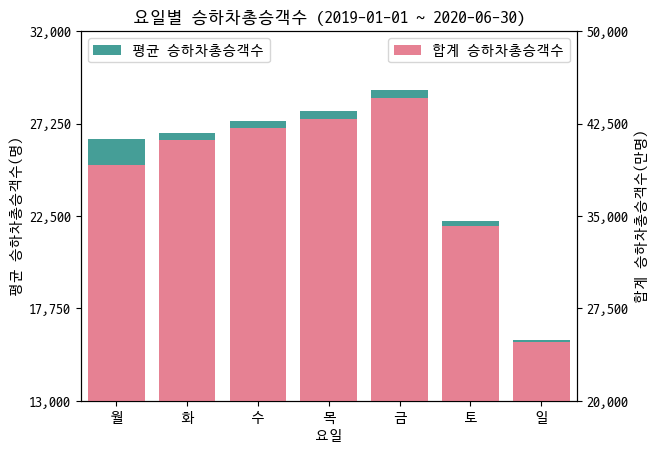

In [7]:
palette = sns.color_palette('husl', n_colors=2)

fig, ax = plt.subplots()
display_mean(ax=ax, color=palette[1], label="평균 승하차총승객수")
ax.legend(loc='upper left')

ax = ax.twinx()
display_sum(ax=ax, color=palette[0], label="합계 승하차총승객수")
ax.legend(loc='upper right')

plt.title('요일별 승하차총승객수 (2019-01-01 ~ 2020-06-30)')

월요일이 합계와 평균이 차이가 난다.

In [8]:
# 각 날짜별 첫번째 데이터만 추출
df = df_subway.groupby('사용일자').first().reset_index()

print(df.groupby('요일').size())

# 사용일자와 요일만 추출
df[['사용일자', '요일']].sort_values('사용일자')

요일
월    25
화    26
수    26
목    26
금    26
토    26
일    26
dtype: int64


/var/folders/ld/qthvz3k91_1239xs6fkx1zx00000gn/T/ipykernel_87484/4097129253.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('요일').size())


,사용일자,요일
0,2019-01-01,화
1,2019-01-02,수
2,2019-01-03,목
3,2019-01-04,금
4,2019-01-05,토
...,...,...
176,2019-06-26,수
177,2019-06-27,목
178,2019-06-28,금
179,2019-06-29,토


다른 요일들은 26번 등장하지만, 월요일만 25번 등장한다.

데이터의 시작과 끝인, 2019-01-01이 화요일 부터 시작하고, 2019-06-30이 일요일로 끝나서 그런 것으로 보인다.


그런고로 어떤 요일의 사용이 많은지를 보려면 평균으로 보는게 좋을 것 같다. 데이터의 분포를 다양한 plot들을 통해 확인해보자.

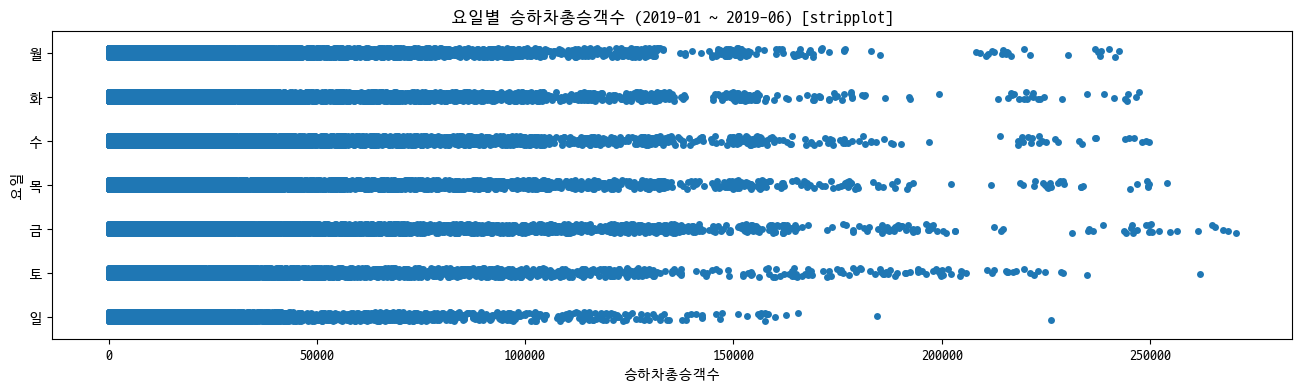

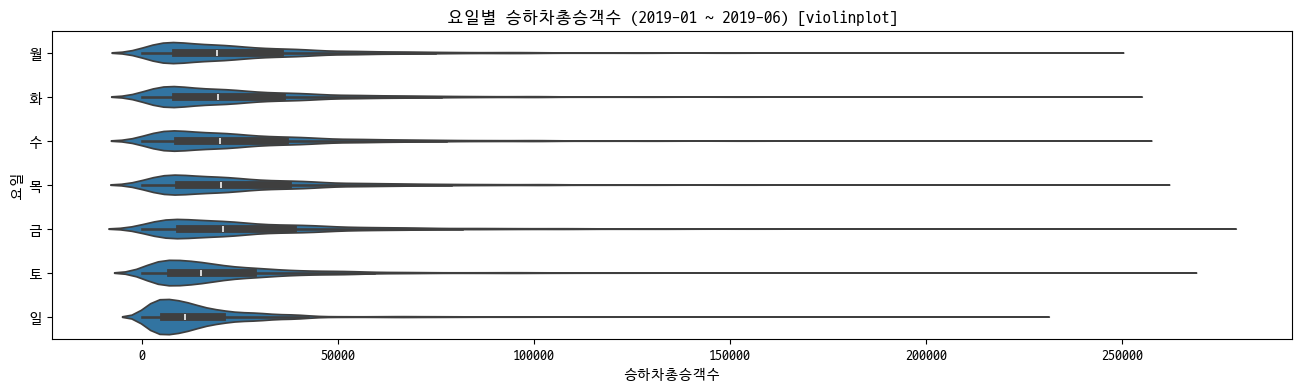

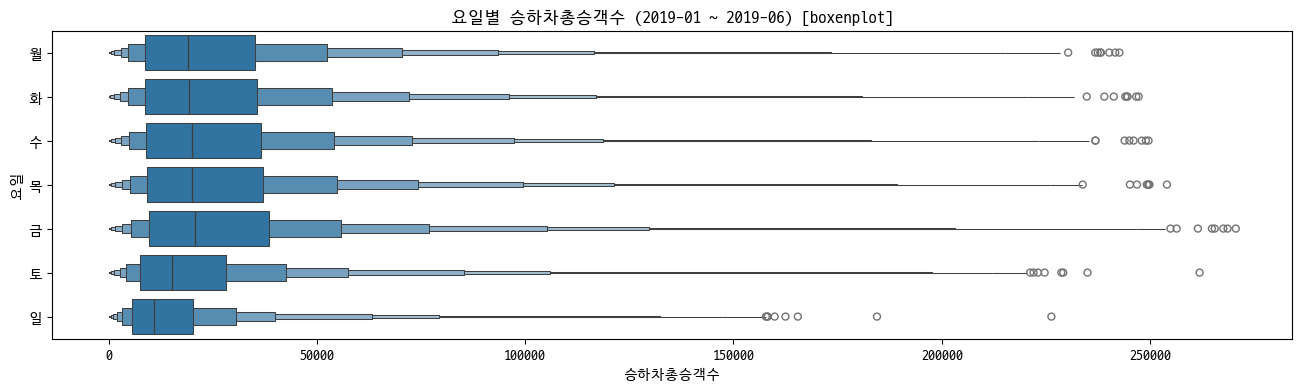

In [9]:
plt.figure(figsize=(16, 4))
plt.title("요일별 승하차총승객수 (2019-01 ~ 2019-06) [stripplot]")
sns.stripplot(data=df_subway, x='승하차총승객수', y='요일')
plt.show()

plt.figure(figsize=(16, 4))
plt.title("요일별 승하차총승객수 (2019-01 ~ 2019-06) [violinplot]")
sns.violinplot(data=df_subway, x='승하차총승객수', y='요일')
plt.show()

plt.figure(figsize=(16, 4))
plt.title("요일별 승하차총승객수 (2019-01 ~ 2019-06) [boxenplot]")
sns.boxenplot(data=df_subway, x='승하차총승객수', y='요일')
plt.show()

값이 특정 구간에 몰려있는 경향이 보이는 것 같다.
정규분포와 비슷하게 보인다 = 정규성을 띄는 것으로 보인다.

평균 값을 주요 지표로 채택해도 될 것 같다.

/Users/hepheir/GitHub/smu-202115064/Training-project-for-AI-X-Pioneers-Basic/venv/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 96.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/hepheir/GitHub/smu-202115064/Training-project-for-AI-X-Pioneers-Basic/venv/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 96.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/hepheir/GitHub/smu-202115064/Training-project-for-AI-X-Pioneers-Basic/venv/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 96.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/hepheir/GitHub/smu-202115064/Training-project-for-AI-X-Pioneers-Basic/venv/lib/python3.12/site-packages/seaborn/categ

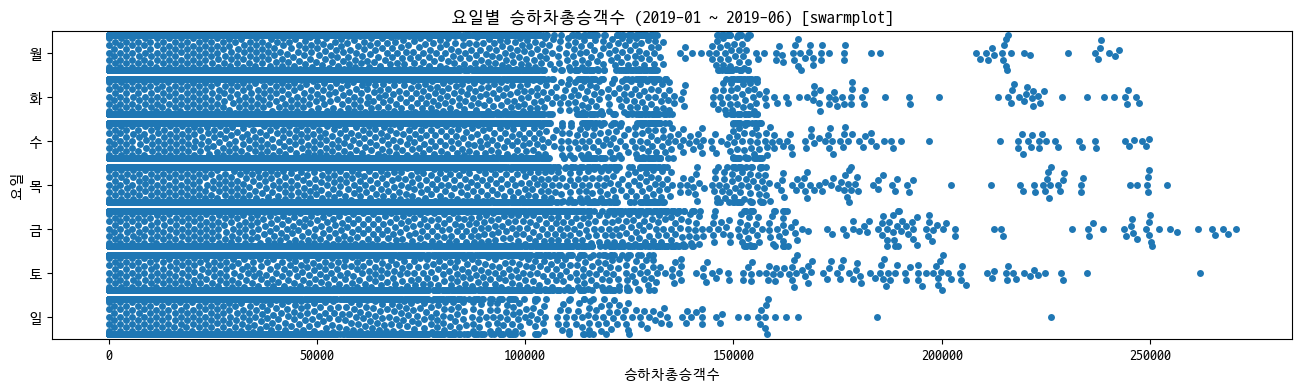

In [10]:
# P.S. swarmplot은 뽑는데 너무 오래걸려서 하단으로 분리함.

plt.figure(figsize=(16, 4))
plt.title("요일별 승하차총승객수 (2019-01 ~ 2019-06) [swarmplot]")
sns.swarmplot(data=df_subway, x='승하차총승객수', y='요일')
plt.show()

P.S. Swarm plot 뽑는데 39m 49.8s 걸렸다. (MBP M2 14inch 기준)